In [1]:
import pandas as pd
import numpy as np
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, RepeatedKFold,StratifiedKFold, train_test_split
from scipy.stats import randint as sp_randint
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape

(550068, 12)

In [4]:
test.shape

(233599, 11)

In [5]:
df1=train.drop(["User_ID","Product_ID","Product_Category_3"],axis=1)
df2=test.drop(["User_ID","Product_ID","Product_Category_3"],axis=1)


In [6]:
df1.shape

(550068, 9)

In [7]:
df2.shape

(233599, 8)

In [8]:
df1["Product_Category_2"]=df1["Product_Category_2"].fillna(-99)
df2["Product_Category_2"]=df2["Product_Category_2"].fillna(-99)

In [9]:
df1["Occupation"]=df1["Occupation"].astype(object)
df2["Occupation"]=df2["Occupation"].astype(object)

In [10]:
df1["Marital_Status"]=df1["Marital_Status"].astype(object)
df1["Product_Category_1"]=df1["Product_Category_1"].astype(object)
df1["Product_Category_2"]=df1["Product_Category_2"].astype(object)
df1["Stay_In_Current_City_Years"]=df1["Stay_In_Current_City_Years"].replace({"4+":"4"})

In [11]:
df2["Marital_Status"]=df2["Marital_Status"].astype(object)
df2["Product_Category_1"]=df2["Product_Category_1"].astype(object)
df2["Product_Category_2"]=df2["Product_Category_2"].astype(object)
df2["Stay_In_Current_City_Years"]=df2["Stay_In_Current_City_Years"].replace({"4+":"4"})

In [12]:
catg_col_1 = df1.select_dtypes(include =['object'])
catg_col_1

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,F,0-17,10,A,2,0,3,-99
1,F,0-17,10,A,2,0,1,6
2,F,0-17,10,A,2,0,12,-99
3,F,0-17,10,A,2,0,12,14
4,M,55+,16,C,4,0,8,-99
...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,-99
550064,F,26-35,1,C,3,0,20,-99
550065,F,26-35,15,B,4,1,20,-99
550066,F,55+,1,C,2,0,20,-99


In [13]:
catg_col_2 = df2.select_dtypes(include =['object'])
catg_col_2

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,M,46-50,7,B,2,1,1,11
1,M,26-35,17,C,0,0,3,5
2,F,36-45,1,B,4,1,5,14
3,F,36-45,1,B,4,1,4,9
4,F,26-35,1,C,1,0,4,5
...,...,...,...,...,...,...,...,...
233594,F,26-35,15,B,4,1,8,-99
233595,F,26-35,15,B,4,1,5,8
233596,F,26-35,15,B,4,1,1,5
233597,F,46-50,1,C,4,0,10,16


In [14]:
df1.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,-99,8370
1,F,0-17,10,A,2,0,1,6,15200
2,F,0-17,10,A,2,0,12,-99,1422
3,F,0-17,10,A,2,0,12,14,1057
4,M,55+,16,C,4,0,8,-99,7969


In [15]:
df1.shape

(550068, 9)

In [16]:
df2.shape

(233599, 8)

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Gender                      550068 non-null  object
 1   Age                         550068 non-null  object
 2   Occupation                  550068 non-null  object
 3   City_Category               550068 non-null  object
 4   Stay_In_Current_City_Years  550068 non-null  object
 5   Marital_Status              550068 non-null  object
 6   Product_Category_1          550068 non-null  object
 7   Product_Category_2          550068 non-null  object
 8   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 37.8+ MB


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Gender                      233599 non-null  object
 1   Age                         233599 non-null  object
 2   Occupation                  233599 non-null  object
 3   City_Category               233599 non-null  object
 4   Stay_In_Current_City_Years  233599 non-null  object
 5   Marital_Status              233599 non-null  object
 6   Product_Category_1          233599 non-null  object
 7   Product_Category_2          233599 non-null  object
dtypes: object(8)
memory usage: 14.3+ MB


In [19]:
df1['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [20]:
dum=pd.get_dummies(data=catg_col_1,drop_first=True)
dum.columns

Index(['Gender_M', 'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50',
       'Age_51-55', 'Age_55+', 'Occupation_1', 'Occupation_2', 'Occupation_3',
       'Occupation_4', 'Occupation_5', 'Occupation_6', 'Occupation_7',
       'Occupation_8', 'Occupation_9', 'Occupation_10', 'Occupation_11',
       'Occupation_12', 'Occupation_13', 'Occupation_14', 'Occupation_15',
       'Occupation_16', 'Occupation_17', 'Occupation_18', 'Occupation_19',
       'Occupation_20', 'City_Category_B', 'City_Category_C',
       'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2',
       'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4',
       'Marital_Status_1', 'Product_Category_1_2', 'Product_Category_1_3',
       'Product_Category_1_4', 'Product_Category_1_5', 'Product_Category_1_6',
       'Product_Category_1_7', 'Product_Category_1_8', 'Product_Category_1_9',
       'Product_Category_1_10', 'Product_Category_1_11',
       'Product_Category_1_12', 'Product_Category_1_13',
     

In [21]:
dum.shape

(550068, 70)

In [22]:
dum2=pd.get_dummies(data=catg_col_2,drop_first=True)
dum2.columns

Index(['Gender_M', 'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50',
       'Age_51-55', 'Age_55+', 'Occupation_1', 'Occupation_2', 'Occupation_3',
       'Occupation_4', 'Occupation_5', 'Occupation_6', 'Occupation_7',
       'Occupation_8', 'Occupation_9', 'Occupation_10', 'Occupation_11',
       'Occupation_12', 'Occupation_13', 'Occupation_14', 'Occupation_15',
       'Occupation_16', 'Occupation_17', 'Occupation_18', 'Occupation_19',
       'Occupation_20', 'City_Category_B', 'City_Category_C',
       'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2',
       'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4',
       'Marital_Status_1', 'Product_Category_1_2', 'Product_Category_1_3',
       'Product_Category_1_4', 'Product_Category_1_5', 'Product_Category_1_6',
       'Product_Category_1_7', 'Product_Category_1_8', 'Product_Category_1_9',
       'Product_Category_1_10', 'Product_Category_1_11',
       'Product_Category_1_12', 'Product_Category_1_13',
     

In [23]:
dum2.shape

(233599, 68)

In [24]:
df1['Product_Category_1'].value_counts(ascending=True)

9        410
17       578
14      1523
19      1603
20      2550
18      3125
7       3721
12      3947
10      5125
13      5549
15      6290
16      9828
4      11753
3      20213
6      20466
2      23864
11     24287
8     113925
1     140378
5     150933
Name: Product_Category_1, dtype: int64

In [25]:
df2['Product_Category_1'].value_counts(ascending=True)

9       194
17      223
14      663
18     1311
7      1624
12     1663
10     2248
13     2381
15     2694
16     4105
4      5003
3      8578
6      8860
11    10153
2     10192
8     48369
1     60321
5     65017
Name: Product_Category_1, dtype: int64

In [26]:
dum.drop('Product_Category_1_19',axis=1,inplace=True)

In [27]:
dum.drop('Product_Category_1_20',axis=1,inplace=True)

In [28]:
dum.shape

(550068, 68)

In [29]:
dum2.shape

(233599, 68)

# Model Building

In [30]:
from sklearn.model_selection import train_test_split
x=dum
y=train["Purchase"]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=0)   
print("Size of x train is",x_train.shape)
print("Size of y train is",y_train.shape)
print("Size of x test is",x_test.shape)
print("Size of y test is",y_test.shape)

Size of x train is (385047, 68)
Size of y train is (385047,)
Size of x test is (165021, 68)
Size of y test is (165021,)


In [31]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(x, y)}')

Coefficients: [ 3.96553774e-01 -1.61822472e+02 -7.29701153e+01  3.89468728e+01
  4.43248351e+01  2.79669496e+02  1.34994382e+02 -4.86196538e+01
  2.98613009e+01  2.46703184e+02  1.46372113e+02  7.99834900e+01
  1.96991704e+02  1.11249570e+02 -2.58886915e+02  8.95279649e+01
 -7.28093202e+01  7.93906197e+01  2.54890780e+02  6.45198963e+01
  1.88500862e+02  3.61065350e+02  1.08904642e+02  1.78060246e+02
 -1.61005184e+01 -2.93873927e+02 -1.00541862e+02  1.38056936e+02
  4.61908610e+02  1.91290951e+00  3.61435163e+01  6.98419213e+00
  2.73825963e+01 -5.12791023e+01 -1.28807197e+03 -1.93918839e+03
 -1.05829958e+04 -6.46022970e+03  2.50741889e+03  4.06746649e+03
 -5.04379344e+03  2.55199851e+03  6.89328759e+03 -7.89404608e+03
 -1.11960295e+04 -1.21804433e+04  6.47294807e+02  2.05264585e+03
  2.48083447e+03 -2.20735699e+03 -9.35834479e+03  1.31418680e+03
  1.76863810e+02 -3.80172676e+02  5.68383852e+02  1.44051008e+03
  1.07546717e+03  1.11013867e+03  3.15136138e+02  1.81703724e+03
  3.1836642

In [33]:
lin_reg = LinearRegression()
model = lin_reg.fit(x_train,y_train)
print(f'R^2 score for train: {lin_reg.score(x_train, y_train)}')
print(f'R^2 score for test: {lin_reg.score(x_test, y_test)}')

R^2 score for train: 0.5938546923816318
R^2 score for test: 0.594732194246071


In [34]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(x)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                 1.184e+04
Date:                Sat, 20 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:54:42   Log-Likelihood:            -5.2201e+06
No. Observations:              550068   AIC:                         1.044e+07
Df Residuals:                  549999   BIC:                         1.044e+07
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         1.203e+04     47.789    251.753      0.000    1.19e+04    1.21e+04
Gender_M                         0.3966     10.515      0.038      0.970     -20.212      21.005
Age_18-25                     -161.8225     43.368     -3.731      0.000    -246.822     -76.823
Age_26-35                      -72.9701     43.229     -1.688      0.091    -157.697      11.756
Age_36-45                       38.9469     43.845      0.888      0.374     -46.988     124.882
Age_46-50                       44.3248     45.793      0.968      0.333     -45.428     134.077
Age_51-55                      279.6695     46.323      6.037      0.000     188.878     370.461
Age_55+                        134.9944     49.027      2.753      0.006      38.903     231.086
Occupation_1                   -48.6197     19.236     -2.528      0.011     -86.321     -10.918
Occupation_2                    29.8613     23.153      1.290      0.197     -15.517      75.240
Occupation_3                   246.7032     27.108      9.101      0.000     193.573     299.833
Occupation_4                   146.3721     18.445      7.936      0.000     110.220     182.524
Occupation_5                    79.9835     31.545      2.536      0.011      18.156     141.811
Occupation_6                   196.9917     25.783      7.640      0.000     146.457     247.526
Occupation_7                   111.2496     18.104      6.145      0.000      75.766     146.733
Occupation_8                  -258.8869     82.589     -3.135      0.002    -420.760     -97.014
Occupation_9                    89.5280     42.917      2.086      0.037       5.412     173.644
Occupation_10                  -72.8093     46.489     -1.566      0.117    -163.925      18.307
Occupation_11                   79.3906     32.249      2.462      0.014      16.183     142.598
Occupation_12                  254.8908     21.922     11.627      0.000     211.924     297.857
Occupation_13                   64.5199     41.459      1.556      0.120     -16.738     145.778
Occupation_14                  188.5009     22.915      8.226      0.000     143.589     233.413
Occupation_15                  361.0653     31.515     11.457      0.000     299.298     422.833
Occupation_16                  108.9046     23.730      4.589      0.000      62.395     155.414
Occupation_17                  178.0602     20.281      8.780      0.000     138.310     217.811
Occupation_18                  -16.1005     41.351     -0.389      0.697     -97.147      64.946
Occupation_19                 -293.8739     37.095     -7.922      0.000    -366.578    -221.170
Occupation_20                 -100.5419     21.392     -4.700      0.000    -142.470     -58.614
City_Category_B                138.0569     10.791     12.793      0.000    

#### Assumption 1- No auto correlation

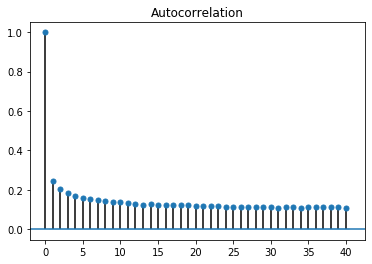

In [35]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg.resid, lags=40 , alpha=0.05)
acf.show()

##### Assumption 2- Normality of Residuals

In [37]:
from scipy import stats
print(stats.jarque_bera(lin_reg.resid))

(127938.32631552873, 0.0)


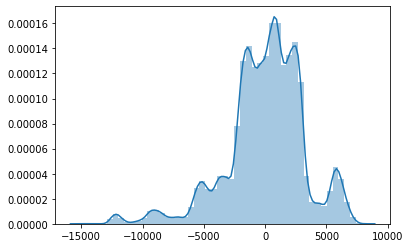

In [38]:
import seaborn as sns
sns.distplot(lin_reg.resid)

### Rainbow test 

In [40]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)

(1.268937844143968, 0.0)

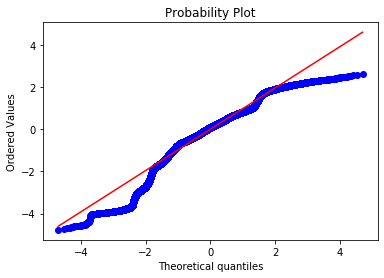

In [41]:
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot
st_residual = lin_reg.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

In [42]:
lin_reg.resid.mean()

1.651746398523839e-11

In [43]:
# which is very much close to zero. so linearity is present

##### Assumption 5- NO  MULTI COLLINEARITY

In [59]:
x=dum
y=train["Purchase"]
xc=sm.add_constant(x)

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif1= [vif(xc.values,i) for i in range(xc.shape[1])]

In [61]:
vif1=pd.DataFrame({'vif': vif1[0:]},index=xc.columns)
pd.set_option('display.Max_columns',None)
vif1.T

,const,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,Occupation_10,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4,Marital_Status_1,Product_Category_1_2,Product_Category_1_3,Product_Category_1_4,Product_Category_1_5,Product_Category_1_6,Product_Category_1_7,Product_Category_1_8,Product_Category_1_9,Product_Category_1_10,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_2_2.0,Product_Category_2_3.0,Product_Category_2_4.0,Product_Category_2_5.0,Product_Category_2_6.0,Product_Category_2_7.0,Product_Category_2_8.0,Product_Category_2_9.0,Product_Category_2_10.0,Product_Category_2_11.0,Product_Category_2_12.0,Product_Category_2_13.0,Product_Category_2_14.0,Product_Category_2_15.0,Product_Category_2_16.0,Product_Category_2_17.0,Product_Category_2_18.0
vif,122.658406,1.104082,14.985402,24.071595,16.519652,8.579797,7.502009,4.849531,1.5657,1.324354,1.225724,2.086263,1.156957,1.272332,1.68899,1.026747,1.118443,2.664322,1.151748,1.380106,1.278739,1.330578,1.153582,1.330573,1.491144,1.092266,1.119278,1.408158,1.523848,1.57446,2.36244,1.944077,1.911089,1.826049,1.14355,1.856439,2.942048,1.394327,2.392117,1.441201,1.073301,2.360906,1.012247,1.129882,1.306798,1.080518,1.099279,1.026082,1.104,1.198309,1.012676,1.065138,1.911263,1.221765,3.441348,1.823019,1.184811,1.005859,1.562499,1.073958,1.163478,1.099043,1.040341,1.124737,1.242311,1.345508,1.38112,1.083669,1.018559


In [68]:
#so, Multicollinearity exists. 

# Removing multicollinearity

In [63]:
x=dum.drop(['Age_26-35'],axis=1)
y=train["Purchase"]
xc=sm.add_constant(x)
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif2= [vif(xc.values,i) for i in range(xc.shape[1])]
vif2=pd.DataFrame({'vif': vif2[0:]},index=xc.columns)
vif2.T

,const,Gender_M,Age_18-25,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,Occupation_10,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4,Marital_Status_1,Product_Category_1_2,Product_Category_1_3,Product_Category_1_4,Product_Category_1_5,Product_Category_1_6,Product_Category_1_7,Product_Category_1_8,Product_Category_1_9,Product_Category_1_10,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_2_2.0,Product_Category_2_3.0,Product_Category_2_4.0,Product_Category_2_5.0,Product_Category_2_6.0,Product_Category_2_7.0,Product_Category_2_8.0,Product_Category_2_9.0,Product_Category_2_10.0,Product_Category_2_11.0,Product_Category_2_12.0,Product_Category_2_13.0,Product_Category_2_14.0,Product_Category_2_15.0,Product_Category_2_16.0,Product_Category_2_17.0,Product_Category_2_18.0
vif,33.283712,1.103182,1.477158,1.238909,1.193466,1.189869,1.27152,1.562111,1.322033,1.222721,2.084299,1.154874,1.269165,1.68193,1.026718,1.117495,1.192727,1.149932,1.377924,1.278266,1.32746,1.151435,1.327674,1.485957,1.091534,1.112862,1.404584,1.522764,1.572158,2.361479,1.94403,1.910792,1.825092,1.134166,1.856435,2.941975,1.394072,2.392055,1.441191,1.073288,2.360897,1.012233,1.129867,1.306796,1.080502,1.099279,1.026081,1.104,1.198305,1.012675,1.06513,1.911247,1.221765,3.441255,1.823008,1.184808,1.005855,1.562442,1.073941,1.163477,1.09904,1.040341,1.124737,1.242294,1.345469,1.381118,1.083669,1.018559


In [ ]:
# here , multicollinearity has been reduced below 5

In [65]:
x.columns

Index(['Gender_M', 'Age_18-25', 'Age_36-45', 'Age_46-50', 'Age_51-55',
       'Age_55+', 'Occupation_1', 'Occupation_2', 'Occupation_3',
       'Occupation_4', 'Occupation_5', 'Occupation_6', 'Occupation_7',
       'Occupation_8', 'Occupation_9', 'Occupation_10', 'Occupation_11',
       'Occupation_12', 'Occupation_13', 'Occupation_14', 'Occupation_15',
       'Occupation_16', 'Occupation_17', 'Occupation_18', 'Occupation_19',
       'Occupation_20', 'City_Category_B', 'City_Category_C',
       'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2',
       'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4',
       'Marital_Status_1', 'Product_Category_1_2', 'Product_Category_1_3',
       'Product_Category_1_4', 'Product_Category_1_5', 'Product_Category_1_6',
       'Product_Category_1_7', 'Product_Category_1_8', 'Product_Category_1_9',
       'Product_Category_1_10', 'Product_Category_1_11',
       'Product_Category_1_12', 'Product_Category_1_13',
       'Product_Ca

In [72]:
x=dum.drop(['Age_26-35'],axis=1)
y = train['Purchase']
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')


Coefficients: [-1.81074951e+00  1.09163420e+02 -2.53555876e+01  2.10196165e+01
  2.55215860e+02  5.46424391e+01  7.62090970e+01  2.56154080e+02
  1.45600386e+02 -1.82286578e+02  1.18141927e+02 -5.04964159e+01
  1.14553541e+02  2.45359162e+02  1.65654786e+02  1.76436814e+02
  3.57069823e+02  1.63153497e+02  1.90895398e+02 -2.29025755e+00
 -3.19683885e+02 -9.25951311e+01  1.50793730e+02  4.82613510e+02
  7.09462587e+00  3.80909233e+01  8.50754627e+00  2.62847635e+01
 -5.84526462e+00 -1.27766095e+03 -1.93904913e+03 -1.05799308e+04
 -6.46147732e+03  2.50441026e+03  4.07543701e+03 -5.03552010e+03
  2.56371878e+03  6.91315716e+03 -7.89318933e+03 -1.11679423e+04
 -1.21630695e+04  6.63452171e+02  2.06462038e+03  2.48381693e+03
 -2.14864479e+03 -9.32633803e+03  1.31318911e+03  1.59067578e+02
 -3.88426979e+02  5.63568792e+02  1.44069515e+03  1.07975766e+03
  1.11581675e+03  3.10031915e+02  1.83709267e+03  3.14856699e+02
  6.06605370e+01  2.74235764e+02  3.52773020e+02  6.75931244e+02
  7.2654155